## 05. adp_기출
- 데이터 8:2로 분할하고 릿지 회귀 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

### 01. 데이터 불러오기

In [130]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_boston

In [131]:
from sklearn.linear_model import Ridge, Lasso

In [132]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target

In [133]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

### 02. 데이터 전처리

In [134]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

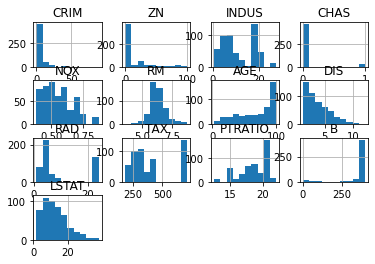

In [135]:
# X값 분포 확인 : 정규분포랑 거리가 있음
X_data.hist()

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2)
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

### 03. 분석

In [137]:
alphas = np.arange(0,1.1,0.1)
alphas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- Ridge

In [138]:
from sklearn.model_selection import cross_val_score

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    r2_ridge = cross_val_score(ridge, x_train, y_train, scoring='r2', cv=10)
    r2_ridge_mean = np.mean(r2_ridge)
    print('alpha={0:1f},r2={1:4f}'.format(alpha,r2_ridge_mean))

alpha=0.000000,r2=0.731024
alpha=0.100000,r2=0.731077
alpha=0.200000,r2=0.731030
alpha=0.300000,r2=0.730925
alpha=0.400000,r2=0.730787
alpha=0.500000,r2=0.730632
alpha=0.600000,r2=0.730469
alpha=0.700000,r2=0.730306
alpha=0.800000,r2=0.730144
alpha=0.900000,r2=0.729988
alpha=1.000000,r2=0.729838


In [139]:
# alpha=0.1 일떄 가장 결정계수 높음!
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
pred_y_ridge = ridge.predict(x_test)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test, pred_y_ridge)))
print(r2_score(y_test, pred_y_ridge))

5.3530738456326175
0.6465695129081155


- Lasso

In [141]:
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    
    r2_lasso = cross_val_score(lasso, x_train, y_train, scoring='r2', cv=10)
    r2_lasso_mean = np.mean(r2_lasso)
    print('alpha={0:1f},r2={1:4f}'.format(alpha,r2_lasso_mean))

alpha=0.000000,r2=0.731024
alpha=0.100000,r2=0.722886
alpha=0.200000,r2=0.720743
alpha=0.300000,r2=0.719213
alpha=0.400000,r2=0.716544
alpha=0.500000,r2=0.713174
alpha=0.600000,r2=0.708907
alpha=0.700000,r2=0.703502
alpha=0.800000,r2=0.697136
alpha=0.900000,r2=0.689816
alpha=1.000000,r2=0.681423


In [142]:
# alpha = 0 일때 가장 결정계수 높음
lasso = Lasso(alpha=0)
lasso.fit(x_train,y_train)
pred_y_lasso = lasso.predict(x_test)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test, pred_y_lasso)))
print(r2_score(y_test, pred_y_lasso))

5.341831696092473
0.648052453835273


---
---

### 04. 로그변환을 통해 정규화
- 모델 좋아짐
    - 결정계수값과 증가
    - RMSE 감소


In [144]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1)

In [145]:
X_data_log = np.log1p(X_data)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

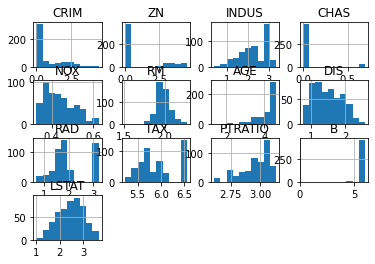

In [146]:
# 정규분포와 가까워짐
X_data_log.hist()

In [147]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(X_data_log, y_target, test_size=0.2)
x_train2.shape,y_train2.shape, x_test2.shape, y_test2.shape

((404, 13), (404,), (102, 13), (102,))

In [148]:
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    r2_ridge = cross_val_score(ridge, x_train2, y_train2, scoring='r2', cv=10)
    r2_ridge_mean = np.mean(r2_ridge)
    print('alpha={0:1f},r2={1:4f}'.format(alpha,r2_ridge_mean))

alpha=0.000000,r2=0.745630
alpha=0.100000,r2=0.744849
alpha=0.200000,r2=0.743829
alpha=0.300000,r2=0.742898
alpha=0.400000,r2=0.742100
alpha=0.500000,r2=0.741422
alpha=0.600000,r2=0.740841
alpha=0.700000,r2=0.740334
alpha=0.800000,r2=0.739885
alpha=0.900000,r2=0.739482
alpha=1.000000,r2=0.739115


In [149]:
# alpha=0.1 일떄 가장 결정계수 높음!
ridge = Ridge(alpha=0.1)
ridge.fit(x_train2,y_train2)
pred_y_ridge = ridge.predict(x_test2)

In [150]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test2, pred_y_ridge)))
print(r2_score(y_test2, pred_y_ridge))

4.534426972775375
0.7821889519436419


---
---

### 05 Standar-Scaler 통한 스케일링
- 스케일링 전과 비교해서 좋아지긴 했지만 로그변환 모델이 더 좋음

In [151]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1)

In [152]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X_data,y_target,test_size=0.2)

In [153]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss_scaler = StandardScaler()

x_train_scaled = ss_scaler.fit_transform(x_train3)
x_test_scaled = ss_scaler.transform(x_test3)

In [154]:
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    r2_ridge = cross_val_score(ridge, x_train_scaled, y_train3, scoring='r2', cv=10)
    r2_ridge_mean = np.mean(r2_ridge)
    print('alpha={0:1f},r2={1:4f}'.format(alpha,r2_ridge_mean))

alpha=0.000000,r2=0.673762
alpha=0.100000,r2=0.673791
alpha=0.200000,r2=0.673819
alpha=0.300000,r2=0.673846
alpha=0.400000,r2=0.673872
alpha=0.500000,r2=0.673898
alpha=0.600000,r2=0.673922
alpha=0.700000,r2=0.673946
alpha=0.800000,r2=0.673970
alpha=0.900000,r2=0.673993
alpha=1.000000,r2=0.674015


In [155]:
# alpha=1 일떄 가장 결정계수 높음!
ridge = Ridge(alpha=1)
ridge.fit(x_train_scaled,y_train3)
pred_y_ridge = ridge.predict(x_test_scaled)

In [156]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test3, pred_y_ridge)))
print(r2_score(y_test3, pred_y_ridge))

4.389563323485774
0.7500821420676956
